<a href="https://colab.research.google.com/github/Anjali-DA/Symposium-source-code/blob/main/HAI_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import string
# Standardization 
from sklearn.preprocessing import StandardScaler
import nltk
# remove stopwords
from nltk.corpus import stopwords
# lemmatization & pos tagging
from nltk import pos_tag
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
df= pd.read_csv('/content/HAI dataset.csv')

In [3]:
df.head()

,Patient ID,Age,Sex,Race,Ethnicity,Medical History,Hospitalization Data,Laboratory Data,Imaging Data,Microbiology Data,Risk Factors,Symptoms,Signs,Treatment,Outcomes,HAI Name
0,1,45,M,White,Non-Hispanic,"Asthma, Hypertension",2023-01-05 to 2023-01-12,"Blood Test: Normal, X-ray: Clear",None,None,"Obesity, Smoking","Cough, Fever",Elevated heart rate,Antibiotics,Recovered,Pneumonia
1,2,32,F,Asian,Hispanic,"Diabetes, Hyperthyroidism",2023-02-10 to 2023-02-18,"Blood Test: Abnormal, CT scan: Inflammation",None,Nasal swab: Positive for influenza,None,"Sore throat, Fatigue",Rapid breathing,Antiviral medication,Recovered,Influenza
2,3,60,M,Black,Non-Hispanic,None,2023-03-15 to 2023-03-22,"Blood Test: Normal, X-ray: Clear",MRI: No abnormalities,None,None,"Headache, Dizziness",None,Rest and hydration,Recovered,Migraine
3,4,28,F,White,Hispanic,"Allergies, Asthma",2023-04-02 to 2023-04-08,Blood Test: Elevated white blood cell count,None,None,None,"Runny nose, Sneezing",None,Antihistamines,Recovered,Allergic Rhinitis
4,9,50,M,White,Non-Hispanic,"Obesity, Sleep Apnea",2023-04-18 to 2023-04-26,Blood Test: Elevated liver enzymes,None,None,"Smoking, Alcohol consumption","Fatigue, Abdominal discomfort",None,"Medications, Lifestyle changes",Recovered,NAFLD (Non-Alcoholic Fatty Liver Disease)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Patient ID            199 non-null    int64 
 1   Age                   199 non-null    int64 
 2   Sex                   199 non-null    object
 3   Race                  199 non-null    object
 4   Ethnicity             199 non-null    object
 5   Medical History       199 non-null    object
 6   Hospitalization Data  199 non-null    object
 7   Laboratory Data       199 non-null    object
 8   Imaging Data          199 non-null    object
 9   Microbiology Data     199 non-null    object
 10  Risk Factors          199 non-null    object
 11  Symptoms              199 non-null    object
 12  Signs                 198 non-null    object
 13  Treatment             198 non-null    object
 14  Outcomes              198 non-null    object
 15  HAI Name              198 non-null    ob

## Data pre-processing

In [5]:
df.isnull().sum()

Patient ID              0
Age                     0
Sex                     0
Race                    0
Ethnicity               0
Medical History         0
Hospitalization Data    0
Laboratory Data         0
Imaging Data            0
Microbiology Data       0
Risk Factors            0
Symptoms                0
Signs                   1
Treatment               1
Outcomes                1
HAI Name                1
dtype: int64

In [6]:
df1= df.drop(['Patient ID'],axis=1)

In [7]:
df1.head()

,Age,Sex,Race,Ethnicity,Medical History,Hospitalization Data,Laboratory Data,Imaging Data,Microbiology Data,Risk Factors,Symptoms,Signs,Treatment,Outcomes,HAI Name
0,45,M,White,Non-Hispanic,"Asthma, Hypertension",2023-01-05 to 2023-01-12,"Blood Test: Normal, X-ray: Clear",None,None,"Obesity, Smoking","Cough, Fever",Elevated heart rate,Antibiotics,Recovered,Pneumonia
1,32,F,Asian,Hispanic,"Diabetes, Hyperthyroidism",2023-02-10 to 2023-02-18,"Blood Test: Abnormal, CT scan: Inflammation",None,Nasal swab: Positive for influenza,None,"Sore throat, Fatigue",Rapid breathing,Antiviral medication,Recovered,Influenza
2,60,M,Black,Non-Hispanic,None,2023-03-15 to 2023-03-22,"Blood Test: Normal, X-ray: Clear",MRI: No abnormalities,None,None,"Headache, Dizziness",None,Rest and hydration,Recovered,Migraine
3,28,F,White,Hispanic,"Allergies, Asthma",2023-04-02 to 2023-04-08,Blood Test: Elevated white blood cell count,None,None,None,"Runny nose, Sneezing",None,Antihistamines,Recovered,Allergic Rhinitis
4,50,M,White,Non-Hispanic,"Obesity, Sleep Apnea",2023-04-18 to 2023-04-26,Blood Test: Elevated liver enzymes,None,None,"Smoking, Alcohol consumption","Fatigue, Abdominal discomfort",None,"Medications, Lifestyle changes",Recovered,NAFLD (Non-Alcoholic Fatty Liver Disease)


In [8]:
df2= df1.drop(['Race','Ethnicity','Outcomes'], axis=1)

In [9]:
df2.head()

,Age,Sex,Medical History,Hospitalization Data,Laboratory Data,Imaging Data,Microbiology Data,Risk Factors,Symptoms,Signs,Treatment,HAI Name
0,45,M,"Asthma, Hypertension",2023-01-05 to 2023-01-12,"Blood Test: Normal, X-ray: Clear",None,None,"Obesity, Smoking","Cough, Fever",Elevated heart rate,Antibiotics,Pneumonia
1,32,F,"Diabetes, Hyperthyroidism",2023-02-10 to 2023-02-18,"Blood Test: Abnormal, CT scan: Inflammation",None,Nasal swab: Positive for influenza,None,"Sore throat, Fatigue",Rapid breathing,Antiviral medication,Influenza
2,60,M,None,2023-03-15 to 2023-03-22,"Blood Test: Normal, X-ray: Clear",MRI: No abnormalities,None,None,"Headache, Dizziness",None,Rest and hydration,Migraine
3,28,F,"Allergies, Asthma",2023-04-02 to 2023-04-08,Blood Test: Elevated white blood cell count,None,None,None,"Runny nose, Sneezing",None,Antihistamines,Allergic Rhinitis
4,50,M,"Obesity, Sleep Apnea",2023-04-18 to 2023-04-26,Blood Test: Elevated liver enzymes,None,None,"Smoking, Alcohol consumption","Fatigue, Abdominal discomfort",None,"Medications, Lifestyle changes",NAFLD (Non-Alcoholic Fatty Liver Disease)


In [10]:
from datetime import datetime

for index, row in df2.iterrows():
    try:
        start_date_str, end_date_str = row['Hospitalization Data'].split(' to ')
        start_date = datetime.strptime(start_date_str, '%Y-%m-%d')
        end_date = datetime.strptime(end_date_str, '%Y-%m-%d')
        days = (end_date - start_date).days
        df2.at[index, 'Hospitalization Data'] = days
    except ValueError:
        print(f"Invalid date range at index {index}: {row['Hospitalization Data']}")



Invalid date range at index 44: 2023-04-15 - 2023-04-20
Invalid date range at index 45: 2023-04-18 - 2023-04-23
Invalid date range at index 46: 2023-04-16 - 2023-04-25
Invalid date range at index 47: 2023-04-19 - 2023-04-30
Invalid date range at index 48: 2023-04-21 - 2023-05-01
Invalid date range at index 49: 2023-04-22 - 2023-04-28
Invalid date range at index 50: 2023-04-25 - 2023-05-03
Invalid date range at index 51: 2023-05-02 - 2023-05-10
Invalid date range at index 52: 2023-05-05 - 2023-05-08
Invalid date range at index 53: 2023-05-07 - 2023-05-11
Invalid date range at index 54: 2023-05-09 - 2023-05-15
Invalid date range at index 55: 2023-05-12 - 2023-05-16
Invalid date range at index 56: 2023-05-13 - 2023-05-15
Invalid date range at index 57: 2023-05-14 - 2023-05-16
Invalid date range at index 58: 2023-05-15 - 2023-05-17


In [11]:
df2.head()

,Age,Sex,Medical History,Hospitalization Data,Laboratory Data,Imaging Data,Microbiology Data,Risk Factors,Symptoms,Signs,Treatment,HAI Name
0,45,M,"Asthma, Hypertension",7,"Blood Test: Normal, X-ray: Clear",None,None,"Obesity, Smoking","Cough, Fever",Elevated heart rate,Antibiotics,Pneumonia
1,32,F,"Diabetes, Hyperthyroidism",8,"Blood Test: Abnormal, CT scan: Inflammation",None,Nasal swab: Positive for influenza,None,"Sore throat, Fatigue",Rapid breathing,Antiviral medication,Influenza
2,60,M,None,7,"Blood Test: Normal, X-ray: Clear",MRI: No abnormalities,None,None,"Headache, Dizziness",None,Rest and hydration,Migraine
3,28,F,"Allergies, Asthma",6,Blood Test: Elevated white blood cell count,None,None,None,"Runny nose, Sneezing",None,Antihistamines,Allergic Rhinitis
4,50,M,"Obesity, Sleep Apnea",8,Blood Test: Elevated liver enzymes,None,None,"Smoking, Alcohol consumption","Fatigue, Abdominal discomfort",None,"Medications, Lifestyle changes",NAFLD (Non-Alcoholic Fatty Liver Disease)


In [12]:
df2['HAI Name'].unique()

array(['Pneumonia', 'Influenza', 'Migraine', 'Allergic Rhinitis',
       'NAFLD (Non-Alcoholic Fatty Liver Disease)', 'Type 2 Diabetes',
       'Osteoporotic Fracture', 'Hypertensive Heart Disease', 'Asthma',
       'Cardiovascular Disease', 'Hypothyroidism', 'None',
       'Breast Cancer', 'Allergic Dermatitis', 'Hypertensive Diabetes',
       'Diabetic Hypertension', 'Fracture', 'Hypertensive Kidney Disease',
       nan, 'Diabetic Infection', 'Unspecified Infection',
       'Respiratory Infection', 'Bone Infection',
       'Cardiovascular Infection', 'Hypertensive Infection', 'COVID-19',
       'Myocardial Infarction', 'Osteoarthritis', 'COPD', 'Hypertension',
       'Fatty Liver Disease', 'Coronary Artery Disease',
       'Asthma exacerbation',
       'Hypertension, Non-alcoholic fatty liver disease', 'Heart failure',
       'Hypertensive cerebrovascular disease', 'Abdominal Infection',
       'Pulmonary Infection', 'Sinus Infection', 'Spinal Infection',
       'Cardiac Infection', 

In [13]:
df2['Signs'].unique()

array(['Elevated heart rate', 'Rapid breathing', 'None',
       'Sensitivity to light', 'Decreased height, Kyphosis',
       'High blood pressure', 'Rapid breathing, Chest tightness',
       'Irregular heart rhythm, Weak pulse in legs',
       'Dry skin, Hair loss', 'Rash, Dry patches',
       'Deformity, Limited range of motion',
       'Sensitivity to light, Visual disturbances',
       'Irregular heart rhythm', 'Decreased height, Fractured bone', nan,
       'High blood pressure, Fever', 'Abnormal heart sounds',
       'Elevated heart rate, Low oxygen saturation',
       'Irregular heartbeat', 'Swelling', 'Wheezing', 'Jaundice',
       'Palpitations', 'Abdominal pain, Nausea',
       'Rapid breathing, Chest discomfort', 'Limited range of motion',
       'High blood pressure, Murmurs'], dtype=object)

## string to numeric conversion
1. Converting M & F to 0 and 1.
2. Numbering the columns- HAI Name from 0 to 5. 
3. Converting the 

In [14]:
df2['Sex'].unique()

array(['M', 'F', 'Male', 'Female'], dtype=object)

In [15]:
df2['Sex']= df2['Sex'].replace(['Female'],'F')
df2['Sex']= df2['Sex'].replace(['Male'],'M')
df2['Sex']= df2['Sex'].map({'F':1,'M':0}).astype(int)

In [16]:
df2.head()

,Age,Sex,Medical History,Hospitalization Data,Laboratory Data,Imaging Data,Microbiology Data,Risk Factors,Symptoms,Signs,Treatment,HAI Name
0,45,0,"Asthma, Hypertension",7,"Blood Test: Normal, X-ray: Clear",None,None,"Obesity, Smoking","Cough, Fever",Elevated heart rate,Antibiotics,Pneumonia
1,32,1,"Diabetes, Hyperthyroidism",8,"Blood Test: Abnormal, CT scan: Inflammation",None,Nasal swab: Positive for influenza,None,"Sore throat, Fatigue",Rapid breathing,Antiviral medication,Influenza
2,60,0,None,7,"Blood Test: Normal, X-ray: Clear",MRI: No abnormalities,None,None,"Headache, Dizziness",None,Rest and hydration,Migraine
3,28,1,"Allergies, Asthma",6,Blood Test: Elevated white blood cell count,None,None,None,"Runny nose, Sneezing",None,Antihistamines,Allergic Rhinitis
4,50,0,"Obesity, Sleep Apnea",8,Blood Test: Elevated liver enzymes,None,None,"Smoking, Alcohol consumption","Fatigue, Abdominal discomfort",None,"Medications, Lifestyle changes",NAFLD (Non-Alcoholic Fatty Liver Disease)


In [17]:
# checking total None values
none_counts = df2.eq('None').sum()
print(none_counts)

Age                       0
Sex                       0
Medical History          75
Hospitalization Data      0
Laboratory Data           0
Imaging Data             65
Microbiology Data       195
Risk Factors             61
Symptoms                 34
Signs                    67
Treatment                26
HAI Name                  5
dtype: int64


In [18]:
# Convert 'None' to 0 in every column
df2 = df2.replace('None', -1)
none_counts = df2.eq('None').sum()
print(none_counts)

Age                     0
Sex                     0
Medical History         0
Hospitalization Data    0
Laboratory Data         0
Imaging Data            0
Microbiology Data       0
Risk Factors            0
Symptoms                0
Signs                   0
Treatment               0
HAI Name                0
dtype: int64


Successfully converted the sex column to numeric

In [19]:
df2['HAI Name']= df2['HAI Name'].replace(['Migraine', 'Allergic Rhinitis',
       'NAFLD (Non-Alcoholic Fatty Liver Disease)', 'Type 2 Diabetes',
       'Osteoporotic Fracture', 'Hypertensive Heart Disease', 'Asthma',
       'Cardiovascular Disease', 'Hypothyroidism',
       'Breast Cancer', 'Allergic Dermatitis', 'Hypertensive Diabetes',
       'Diabetic Hypertension', 'Fracture', 'Hypertensive Kidney Disease',
     'Diabetic Infection', 'Bone Infection',
       'Cardiovascular Infection', 'Hypertensive Infection','Myocardial Infarction', 'Osteoarthritis', 'COPD', 'Hypertension',
       'Fatty Liver Disease', 'Coronary Artery Disease',
       'Asthma exacerbation','Hypertension, Non-alcoholic fatty liver disease', 'Heart failure',
       'Hypertensive cerebrovascular disease'],'other')

In [20]:
df2.head()

,Age,Sex,Medical History,Hospitalization Data,Laboratory Data,Imaging Data,Microbiology Data,Risk Factors,Symptoms,Signs,Treatment,HAI Name
0,45,0,"Asthma, Hypertension",7,"Blood Test: Normal, X-ray: Clear",-1,-1,"Obesity, Smoking","Cough, Fever",Elevated heart rate,Antibiotics,Pneumonia
1,32,1,"Diabetes, Hyperthyroidism",8,"Blood Test: Abnormal, CT scan: Inflammation",-1,Nasal swab: Positive for influenza,-1,"Sore throat, Fatigue",Rapid breathing,Antiviral medication,Influenza
2,60,0,-1,7,"Blood Test: Normal, X-ray: Clear",MRI: No abnormalities,-1,-1,"Headache, Dizziness",-1,Rest and hydration,other
3,28,1,"Allergies, Asthma",6,Blood Test: Elevated white blood cell count,-1,-1,-1,"Runny nose, Sneezing",-1,Antihistamines,other
4,50,0,"Obesity, Sleep Apnea",8,Blood Test: Elevated liver enzymes,-1,-1,"Smoking, Alcohol consumption","Fatigue, Abdominal discomfort",-1,"Medications, Lifestyle changes",other


In [21]:
df2= df2.dropna()

In [22]:
df2['HAI Name'].unique()

array(['Pneumonia', 'Influenza', 'other', -1, 'Unspecified Infection',
       'Respiratory Infection', 'COVID-19', 'Abdominal Infection',
       'Pulmonary Infection', 'Sinus Infection', 'Spinal Infection',
       'Cardiac Infection', 'Tumor Infection', 'Brain Infection',
       'Pancreatic Infection'], dtype=object)

In [23]:
df2['Symptoms'].unique()

array(['Cough, Fever', 'Sore throat, Fatigue', 'Headache, Dizziness',
       'Runny nose, Sneezing', 'Fatigue, Abdominal discomfort',
       'Severe headache, Nausea', 'Fatigue, Increased thirst',
       'Bone pain, Fracture', 'Fatigue, Shortness of breath',
       'Wheezing, Shortness of breath', 'Chest pain, Leg pain',
       'Fatigue, Weight gain', 'Fever, Headache',
       'Breast lump, Breast pain', 'Itchy skin, Redness',
       'Shortness of breath, Wheezing', 'Pain, Swelling',
       'Fatigue, Swelling in legs', 'Chest pain, Fatigue', -1,
       'Chest pain', 'Fever, Cough, Fatigue',
       'Cough, Shortness of breath', 'Joint pain, Stiffness',
       'Shortness of breath, Chronic cough', 'Fatigue, Muscle weakness',
       'Fatigue, Abdominal pain', 'Fatigue, Chest discomfort',
       'Cough, Wheezing', 'Coughing, Wheezing',
       'Nasal congestion, Sneezing', 'Back pain, Leg numbness',
       'Fatigue, Weight loss', 'Abdominal pain, Weight loss'],
      dtype=object)

In [24]:
df2['HAI Name']= df2['HAI Name'].map({'other':0,'Pneumonia':1,'Influenza':2,'Unspecified Infection':3,'COVID-19':4,'Respiratory Infection':5})

In [25]:
df2.head()

,Age,Sex,Medical History,Hospitalization Data,Laboratory Data,Imaging Data,Microbiology Data,Risk Factors,Symptoms,Signs,Treatment,HAI Name
0,45,0,"Asthma, Hypertension",7,"Blood Test: Normal, X-ray: Clear",-1,-1,"Obesity, Smoking","Cough, Fever",Elevated heart rate,Antibiotics,1.0
1,32,1,"Diabetes, Hyperthyroidism",8,"Blood Test: Abnormal, CT scan: Inflammation",-1,Nasal swab: Positive for influenza,-1,"Sore throat, Fatigue",Rapid breathing,Antiviral medication,2.0
2,60,0,-1,7,"Blood Test: Normal, X-ray: Clear",MRI: No abnormalities,-1,-1,"Headache, Dizziness",-1,Rest and hydration,0.0
3,28,1,"Allergies, Asthma",6,Blood Test: Elevated white blood cell count,-1,-1,-1,"Runny nose, Sneezing",-1,Antihistamines,0.0
4,50,0,"Obesity, Sleep Apnea",8,Blood Test: Elevated liver enzymes,-1,-1,"Smoking, Alcohol consumption","Fatigue, Abdominal discomfort",-1,"Medications, Lifestyle changes",0.0


In [26]:
df2.head()

,Age,Sex,Medical History,Hospitalization Data,Laboratory Data,Imaging Data,Microbiology Data,Risk Factors,Symptoms,Signs,Treatment,HAI Name
0,45,0,"Asthma, Hypertension",7,"Blood Test: Normal, X-ray: Clear",-1,-1,"Obesity, Smoking","Cough, Fever",Elevated heart rate,Antibiotics,1.0
1,32,1,"Diabetes, Hyperthyroidism",8,"Blood Test: Abnormal, CT scan: Inflammation",-1,Nasal swab: Positive for influenza,-1,"Sore throat, Fatigue",Rapid breathing,Antiviral medication,2.0
2,60,0,-1,7,"Blood Test: Normal, X-ray: Clear",MRI: No abnormalities,-1,-1,"Headache, Dizziness",-1,Rest and hydration,0.0
3,28,1,"Allergies, Asthma",6,Blood Test: Elevated white blood cell count,-1,-1,-1,"Runny nose, Sneezing",-1,Antihistamines,0.0
4,50,0,"Obesity, Sleep Apnea",8,Blood Test: Elevated liver enzymes,-1,-1,"Smoking, Alcohol consumption","Fatigue, Abdominal discomfort",-1,"Medications, Lifestyle changes",0.0


spliting numerical and text dataset to perform feature extraction

In [27]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 198 entries, 0 to 198
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   198 non-null    int64  
 1   Sex                   198 non-null    int64  
 2   Medical History       198 non-null    object 
 3   Hospitalization Data  198 non-null    object 
 4   Laboratory Data       198 non-null    object 
 5   Imaging Data          198 non-null    object 
 6   Microbiology Data     198 non-null    object 
 7   Risk Factors          198 non-null    object 
 8   Symptoms              198 non-null    object 
 9   Signs                 198 non-null    object 
 10  Treatment             198 non-null    object 
 11  HAI Name              150 non-null    float64
dtypes: float64(1), int64(2), object(9)
memory usage: 20.1+ KB


In [28]:
nc = df2.select_dtypes(include = ['int', 'float']).columns
tc = df2.select_dtypes(include = 'object').columns

nd = df2[nc]
td = df2[tc]
print(nd.head())
td.head()

   Age  Sex  HAI Name
0   45    0       1.0
1   32    1       2.0
2   60    0       0.0
3   28    1       0.0
4   50    0       0.0


,Medical History,Hospitalization Data,Laboratory Data,Imaging Data,Microbiology Data,Risk Factors,Symptoms,Signs,Treatment
0,"Asthma, Hypertension",7,"Blood Test: Normal, X-ray: Clear",-1,-1,"Obesity, Smoking","Cough, Fever",Elevated heart rate,Antibiotics
1,"Diabetes, Hyperthyroidism",8,"Blood Test: Abnormal, CT scan: Inflammation",-1,Nasal swab: Positive for influenza,-1,"Sore throat, Fatigue",Rapid breathing,Antiviral medication
2,-1,7,"Blood Test: Normal, X-ray: Clear",MRI: No abnormalities,-1,-1,"Headache, Dizziness",-1,Rest and hydration
3,"Allergies, Asthma",6,Blood Test: Elevated white blood cell count,-1,-1,-1,"Runny nose, Sneezing",-1,Antihistamines
4,"Obesity, Sleep Apnea",8,Blood Test: Elevated liver enzymes,-1,-1,"Smoking, Alcohol consumption","Fatigue, Abdominal discomfort",-1,"Medications, Lifestyle changes"


In [29]:
# preprocessing the numerical dataset
scaler = StandardScaler()
std_nd = scaler.fit_transform(nd)
std_nd = pd.DataFrame(std_nd, columns = nd.columns)
std_nd.head()

,Age,Sex,HAI Name
0,-0.860535,-1.095445,-0.393204
1,-1.712465,0.912871,0.071210
2,0.122461,-1.095445,-0.857618
3,-1.974598,0.912871,-0.857618
4,-0.532870,-1.095445,-0.857618


In [30]:
td.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 198 entries, 0 to 198
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Medical History       198 non-null    object
 1   Hospitalization Data  198 non-null    object
 2   Laboratory Data       198 non-null    object
 3   Imaging Data          198 non-null    object
 4   Microbiology Data     198 non-null    object
 5   Risk Factors          198 non-null    object
 6   Symptoms              198 non-null    object
 7   Signs                 198 non-null    object
 8   Treatment             198 non-null    object
dtypes: object(9)
memory usage: 15.5+ KB


In [31]:
# preprocessing the text dataset
# 1. to lowercase


for column in td.columns:
    if df[column].dtype == 'int64':
        continue
    else:
        td[column] = td[column].str.lower()
td.head()

<ipython-input-31-b3a9a7cd0ad7>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  td[column] = td[column].str.lower()


,Medical History,Hospitalization Data,Laboratory Data,Imaging Data,Microbiology Data,Risk Factors,Symptoms,Signs,Treatment
0,"asthma, hypertension",NaN,"blood test: normal, x-ray: clear",NaN,NaN,"obesity, smoking","cough, fever",elevated heart rate,antibiotics
1,"diabetes, hyperthyroidism",NaN,"blood test: abnormal, ct scan: inflammation",NaN,nasal swab: positive for influenza,NaN,"sore throat, fatigue",rapid breathing,antiviral medication
2,NaN,NaN,"blood test: normal, x-ray: clear",mri: no abnormalities,NaN,NaN,"headache, dizziness",NaN,rest and hydration
3,"allergies, asthma",NaN,blood test: elevated white blood cell count,NaN,NaN,NaN,"runny nose, sneezing",NaN,antihistamines
4,"obesity, sleep apnea",NaN,blood test: elevated liver enzymes,NaN,NaN,"smoking, alcohol consumption","fatigue, abdominal discomfort",NaN,"medications, lifestyle changes"


In [32]:
td.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 198 entries, 0 to 198
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Medical History       124 non-null    object
 1   Hospitalization Data  15 non-null     object
 2   Laboratory Data       198 non-null    object
 3   Imaging Data          134 non-null    object
 4   Microbiology Data     4 non-null      object
 5   Risk Factors          138 non-null    object
 6   Symptoms              165 non-null    object
 7   Signs                 131 non-null    object
 8   Treatment             172 non-null    object
dtypes: object(9)
memory usage: 15.5+ KB


In [33]:
# remove punctuation

for column in td.columns:
    td[column]= td[column].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)) if isinstance(x, str) else x)
td.head()

<ipython-input-33-51b783896bea>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  td[column]= td[column].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)) if isinstance(x, str) else x)


,Medical History,Hospitalization Data,Laboratory Data,Imaging Data,Microbiology Data,Risk Factors,Symptoms,Signs,Treatment
0,asthma hypertension,NaN,blood test normal xray clear,NaN,NaN,obesity smoking,cough fever,elevated heart rate,antibiotics
1,diabetes hyperthyroidism,NaN,blood test abnormal ct scan inflammation,NaN,nasal swab positive for influenza,NaN,sore throat fatigue,rapid breathing,antiviral medication
2,NaN,NaN,blood test normal xray clear,mri no abnormalities,NaN,NaN,headache dizziness,NaN,rest and hydration
3,allergies asthma,NaN,blood test elevated white blood cell count,NaN,NaN,NaN,runny nose sneezing,NaN,antihistamines
4,obesity sleep apnea,NaN,blood test elevated liver enzymes,NaN,NaN,smoking alcohol consumption,fatigue abdominal discomfort,NaN,medications lifestyle changes


In [34]:
import nltk

In [35]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [36]:
for column in td.columns:
    stop_words = set(stopwords.words('english'))
    td[column] =td[column].apply(lambda x: ' '.join([word for word in str(x).split() if word.lower() not in stop_words]))

<ipython-input-36-216eb31ba6f7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  td[column] =td[column].apply(lambda x: ' '.join([word for word in str(x).split() if word.lower() not in stop_words]))


In [37]:
lemmatizer = WordNetLemmatizer()

def lemmatize_word(word, pos_tag):
    if pos_tag.startswith('J'):
        pos = wordnet.ADJ
    elif pos_tag.startswith('V'):
        pos = wordnet.VERB
    elif pos_tag.startswith('N'):
        pos = wordnet.NOUN
    elif pos_tag.startswith('R'):
        pos = wordnet.ADV
    else:
        pos = wordnet.NOUN
    return lemmatizer.lemmatize(word, pos)

def lemmatize_column(column):
    if column == 'NaN':
        return column
    elif isinstance(column, str):
        tokens = word_tokenize(column)
        pos_tags = nltk.pos_tag(tokens)
        lemmatized_words = [lemmatize_word(word, pos_tag) for word, pos_tag in pos_tags]
        return ' '.join(lemmatized_words)
    else:
        return column

#     Applying lemmatization to each column in dataset
for column in td.columns:
    td.loc[:, column] = td[column].apply(lemmatize_column)

td.head()

<ipython-input-37-5facfc35e878>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  td.loc[:, column] = td[column].apply(lemmatize_column)


,Medical History,Hospitalization Data,Laboratory Data,Imaging Data,Microbiology Data,Risk Factors,Symptoms,Signs,Treatment
0,asthma hypertension,nan,blood test normal xray clear,nan,nan,obesity smoking,cough fever,elevate heart rate,antibiotic
1,diabetes hyperthyroidism,nan,blood test abnormal ct scan inflammation,nan,nasal swab positive influenza,nan,sore throat fatigue,rapid breathing,antiviral medication
2,nan,nan,blood test normal xray clear,mri abnormality,nan,nan,headache dizziness,nan,rest hydration
3,allergy asthma,nan,blood test elevate white blood cell count,nan,nan,nan,runny nose sneeze,nan,antihistamine
4,obesity sleep apnea,nan,blood test elevate liver enzyme,nan,nan,smoke alcohol consumption,fatigue abdominal discomfort,nan,medication lifestyle change


In [38]:

vectorizer = TfidfVectorizer()

In [39]:
text_columns = ['Medical History', 'Laboratory Data', 'Imaging Data', 'Microbiology Data',
                'Risk Factors', 'Symptoms', 'Signs', 'Treatment']
# td = td.astype(str).replace(-1, '-1_str')

td['Combined Text'] = td[text_columns].apply(lambda x: ' '.join(x.dropna().astype(str)), axis=1)

vectorized_data = vectorizer.fit_transform(td['Combined Text'])

vectorized_df = pd.DataFrame(vectorized_data.toarray(), columns=vectorizer.get_feature_names_out())
# vectorized_df = vectorized_df.replace('-1_str', -1)

vectorized_text_data = pd.concat([td, vectorized_df], axis=1)

# print(vectorized_text_data)
vectorized_text_data.head()

<ipython-input-39-441416d15eab>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  td['Combined Text'] = td[text_columns].apply(lambda x: ' '.join(x.dropna().astype(str)), axis=1)


,Medical History,Hospitalization Data,Laboratory Data,Imaging Data,Microbiology Data,Risk Factors,Symptoms,Signs,Treatment,Combined Text,...,visual,wall,wbc,weak,weakness,weight,wheeze,wheezing,white,xray
0,asthma hypertension,nan,blood test normal xray clear,nan,nan,obesity smoking,cough fever,elevate heart rate,antibiotic,asthma hypertension blood test normal xray cle...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.164762
1,diabetes hyperthyroidism,nan,blood test abnormal ct scan inflammation,nan,nasal swab positive influenza,nan,sore throat fatigue,rapid breathing,antiviral medication,diabetes hyperthyroidism blood test abnormal c...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
2,nan,nan,blood test normal xray clear,mri abnormality,nan,nan,headache dizziness,nan,rest hydration,nan blood test normal xray clear mri abnormali...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.166831
3,allergy asthma,nan,blood test elevate white blood cell count,nan,nan,nan,runny nose sneeze,nan,antihistamine,allergy asthma blood test elevate white blood ...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.338474,0.000000
4,obesity sleep apnea,nan,blood test elevate liver enzyme,nan,nan,smoke alcohol consumption,fatigue abdominal discomfort,nan,medication lifestyle change,obesity sleep apnea blood test elevate liver e...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000


In [40]:
# Concatenate the vectorized data with the numerical dataset
combined_data = pd.concat([nd, vectorized_df], axis=1)
# print(combined_data)
combined_data.head()

,Age,Sex,HAI Name,abdomen,abdominal,abnormal,abnormality,alcohol,allergens,allergy,...,visual,wall,wbc,weak,weakness,weight,wheeze,wheezing,white,xray
0,45.0,0.0,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.164762
1,32.0,1.0,2.0,0.0,0.000000,0.167524,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
2,60.0,0.0,0.0,0.0,0.000000,0.000000,0.444123,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.166831
3,28.0,1.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.313967,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.338474,0.000000
4,50.0,0.0,0.0,0.0,0.268595,0.000000,0.000000,0.309953,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000


In [41]:
combined_data= combined_data.dropna()

# training the model

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

In [43]:
X = combined_data.drop(columns=['HAI Name'])
y = combined_data['HAI Name']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
# svm
svm = SVC()
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)
svm_accuracy = accuracy_score(y_test, y_pred)*100
print("Accuracy:", svm_accuracy, "%")

svm_score = cross_val_score(svm, X_train, y_train, cv=6)
print('svm cross validation score',round(svm_score.mean()*100,2).astype(str),'%' )

Accuracy: 53.333333333333336 %
svm cross validation score 53.77 %


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=6.
  warnings.warn(


In [45]:
# Random Forest Classifer
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred)*100
print("Accuracy:", rf_accuracy, "%")

rf_score = cross_val_score(rf, X_train, y_train, cv=6)
print('rfc cross validation score',round(rf_score.mean()*100,2).astype(str),'%' )

Accuracy: 80.0 %


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=6.
  warnings.warn(


rfc cross validation score 88.33 %


In [46]:
#  Naive bayes
nb = GaussianNB()
nb.fit(X_train, y_train)

y_pred = nb.predict(X_test)
nb_accuracy = accuracy_score(y_test, y_pred)*100
print("Accuracy:", nb_accuracy, "%")

nb_score= cross_val_score(nb,X_train,y_train,cv=6)
print('naive bayes cross validation score',round(nb_score.mean()*100,2).astype(str),'%' )

Accuracy: 70.0 %
naive bayes cross validation score 72.28 %


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=6.
  warnings.warn(


In [47]:
# GridSearchCV
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train, y_train)
svc = grid_svc.best_estimator_

y_pred = grid_svc.predict(X_test)
svc_accuracy = accuracy_score(y_test, y_pred)*100
print("Accuracy:", nb_accuracy, "%")

svc_score= cross_val_score(svc,X_train,y_train,cv=6)
print('svc cross validation score',round(svc_score.mean()*100,2).astype(str),'%' )

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Accuracy: 70.0 %


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=6.
  warnings.warn(


svc cross validation score 89.17 %


In [48]:
# showing the result of all algorithm
algorithms = ["SVM","Random Forest", "Gaussian NB", "GridSearchCV"]
accuracy = [svm_accuracy, rf_accuracy, nb_accuracy, svc_accuracy]
cross_val_score = [svm_score,rf_score,nb_score,svc_score]
cross_val_score = [round(svm_score.mean()*100,2),round(rf_score.mean()*100,2),round(nb_score.mean()*100,2),round(svc_score.mean()*100,2)]

results = pd.DataFrame({"Algorithm": algorithms, "Accuracy": accuracy, "cross_val_score": cross_val_score})
results.head()

,Algorithm,Accuracy,cross_val_score
0,SVM,53.333333,53.77
1,Random Forest,80.000000,88.33
2,Gaussian NB,70.000000,72.28
3,GridSearchCV,83.333333,89.17


## Visualization

<ipython-input-60-e1a9f00fe4fd>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,1,1)


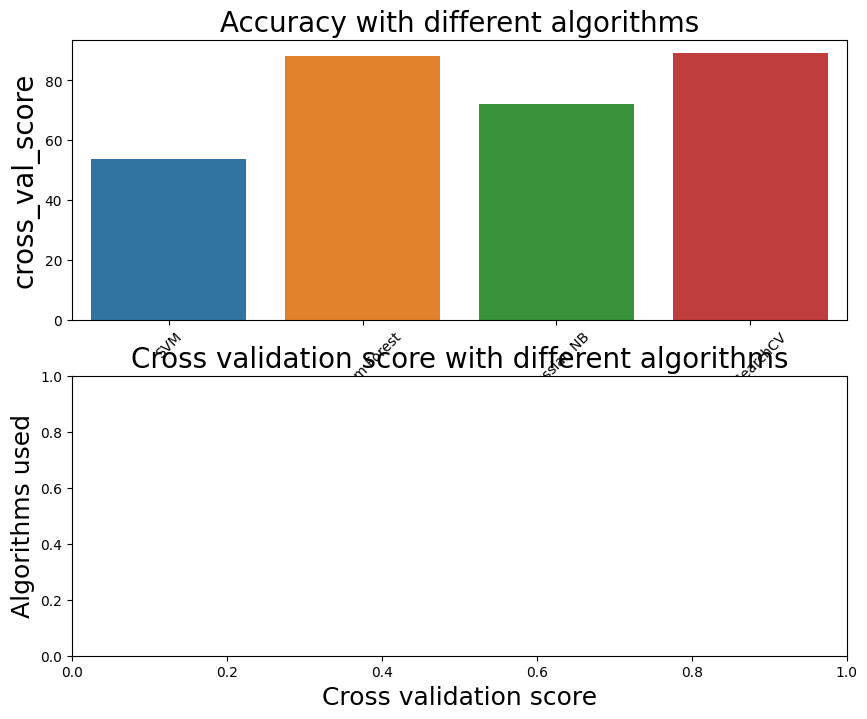

In [60]:
plt.figure(figsize=(10,8))
ax=sns.barplot(x=results['Algorithm'],y=results['Accuracy'])
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
plt.subplot(2,1,1)
plt.title('Accuracy with different algorithms',fontsize=20)
plt.xlabel('Accuracy',fontsize=20)
plt.ylabel('Algorithms used',fontsize=20)




ax=sns.barplot(x=results['Algorithm'],y=results['cross_val_score'])
plt.subplot(2,1,2)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.title('Cross validation score with different algorithms',fontsize=20)
plt.xlabel('Cross validation score',fontsize=18)
plt.ylabel('Algorithms used',fontsize='18')

plt.show()


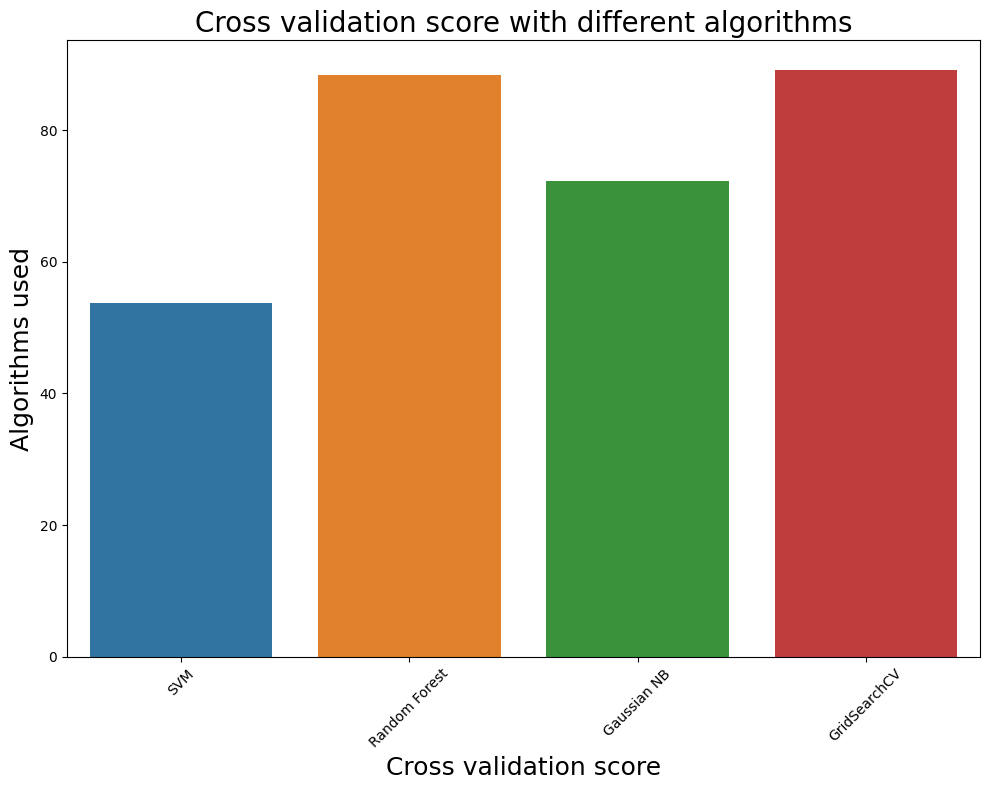

In [50]:
plt.figure(figsize=(10,8))
ax=sns.barplot(x=results['Algorithm'],y=results['cross_val_score'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.title('Cross validation score with different algorithms',fontsize=20)
plt.xlabel('Cross validation score',fontsize=18)
plt.ylabel('Algorithms used',fontsize='18')
plt.tight_layout()